In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the data 


In [157]:
diabetes = pd.read_csv("diabetic_data.csv")
id_mapping = pd.read_csv("IDs_mapping.csv")

#### Dimensions of the data

In [158]:
print(diabetes.shape)
print(id_mapping.shape)

(101766, 50)
(67, 2)


#### Structure of the data

In [159]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#### Missing values

In [160]:
diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

#### Replacing '?' with missing values

In [161]:
a = ['race','payer_code','weight','medical_specialty','diag_1','diag_2','diag_3']

for i in a :
    diabetes[i] = diabetes[i].replace("?",np.NAN)
# Gender variable
diabetes.gender = diabetes.gender.replace('Unknown/Invalid',np.NAN)

In [162]:
diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

#### Numerical attributes

In [163]:
diabetes_num_attr = diabetes.ix[:,['encounter_id','patient_nbr',
                                                'time_in_hospital','num_lab_procedures',
                                                'num_procedures','num_medications',
                                                'number_outpatient','number_emergency',
                                                'number_inpatient','number_diagnoses']]
diabetes_num_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categorical attributes

In [164]:
diabetes_cat_attr = diabetes.ix[:,["race", "gender", "age", "admission_type_id", "discharge_disposition_id",
"admission_source_id", "payer_code", "medical_specialty", "diag_1", 
"diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", 
"repaglinide", "nateglinide", "chlorpropamide", "glimepiride", 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", 
"rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", 
"examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", 
"glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone", 
"change", "diabetesMed", "readmitted"]]

diabetes_cat_attr.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
payer_code                  object
medical_specialty           object
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide             

#### Chnaging the attribute types

In [165]:
# Categorical attributes
for i in diabetes_cat_attr:
    diabetes_cat_attr[i] = diabetes_cat_attr[i].astype('category')
diabetes_cat_attr.dtypes

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
pioglitazone                category
rosiglitazone               category
acarbose                    category
miglitol                    category
troglitazone                category
t

In [166]:
for i in diabetes_cat_attr:
    print(diabetes_cat_attr[i].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female    54708
Male      47055
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      

#### Plots for Categorical attributes

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


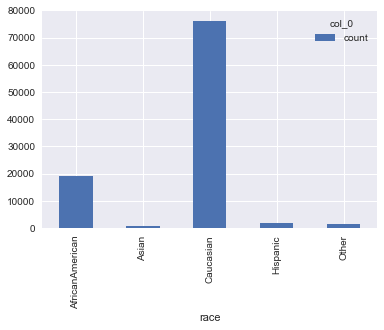

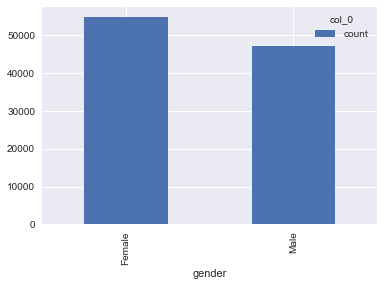

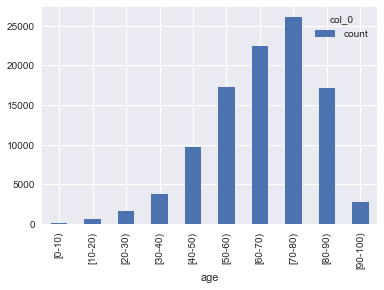

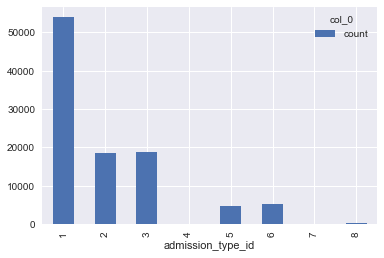

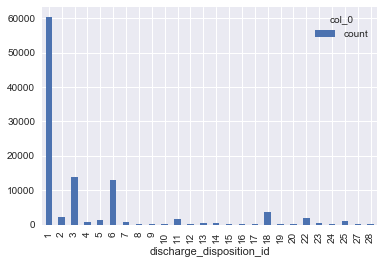

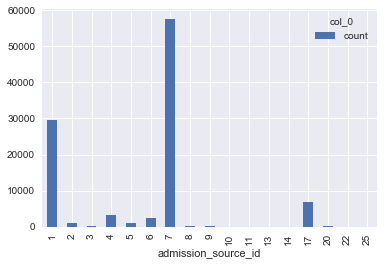

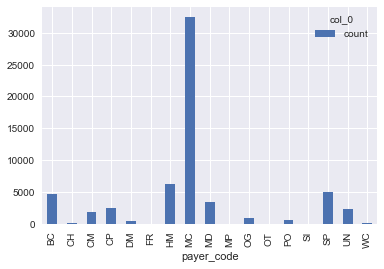

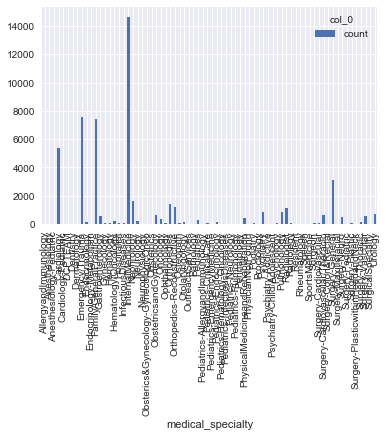

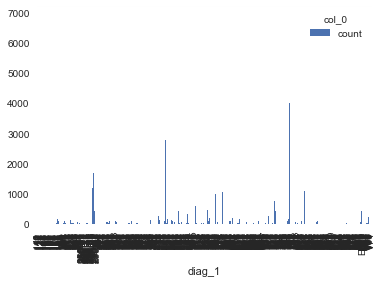

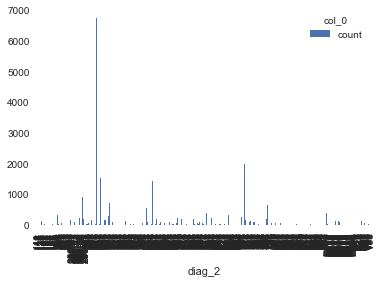

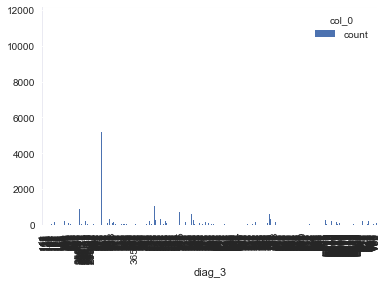

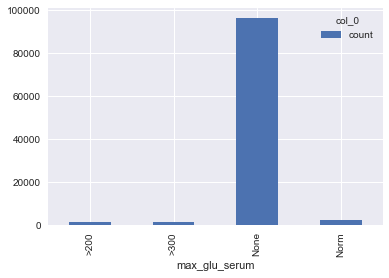

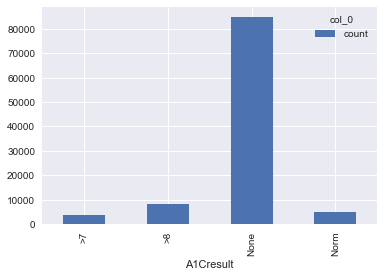

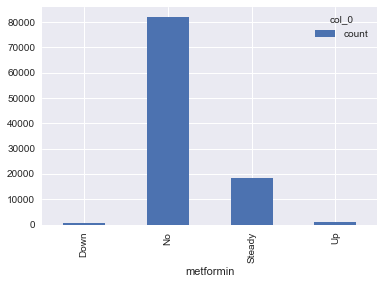

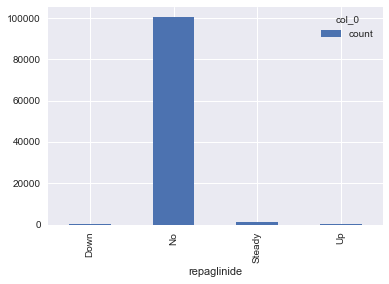

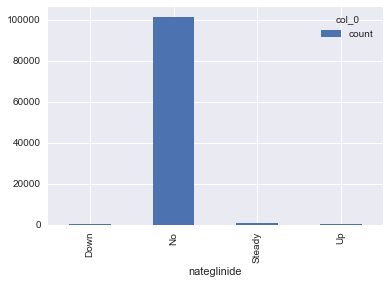

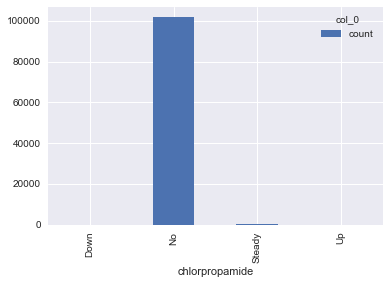

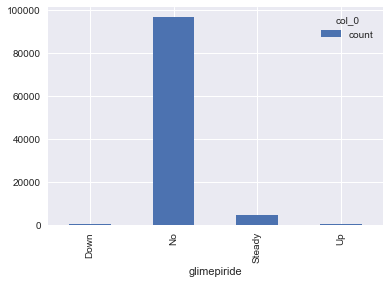

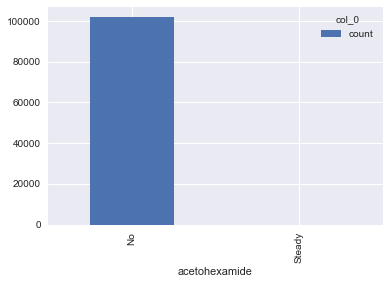

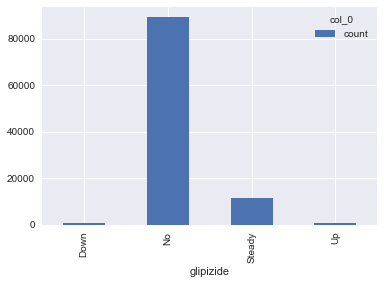

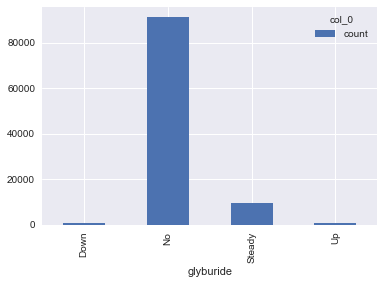

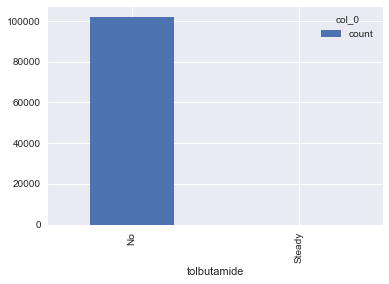

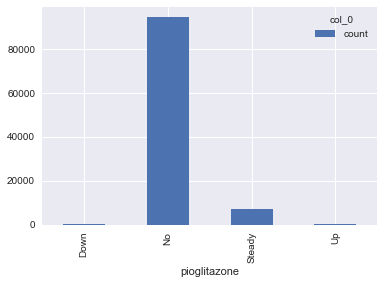

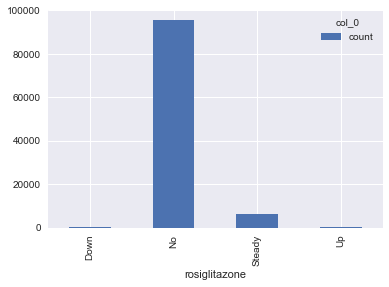

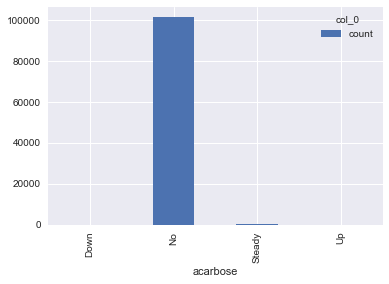

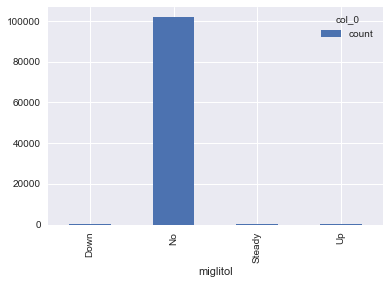

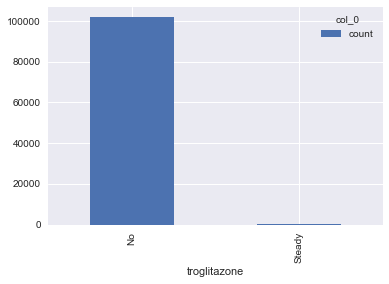

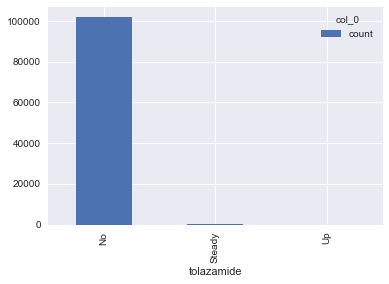

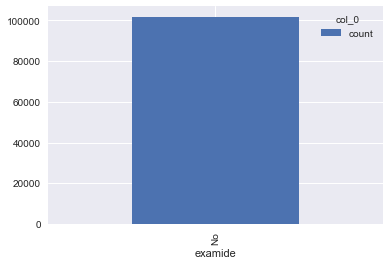

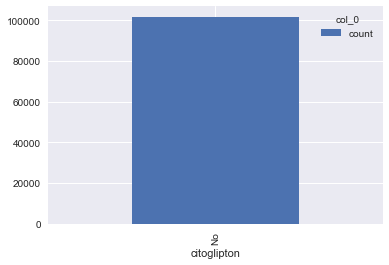

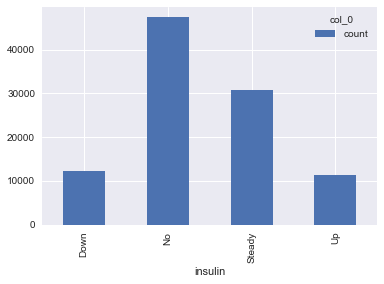

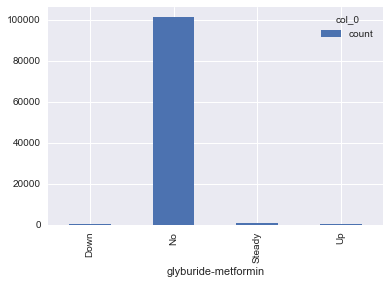

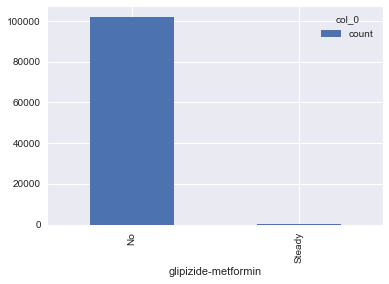

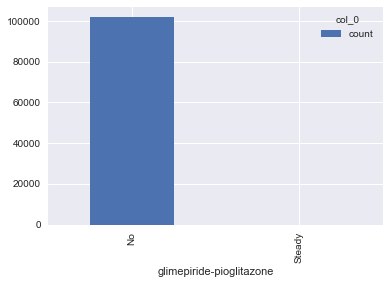

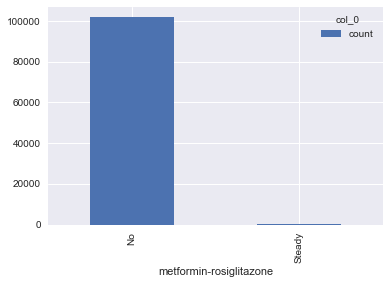

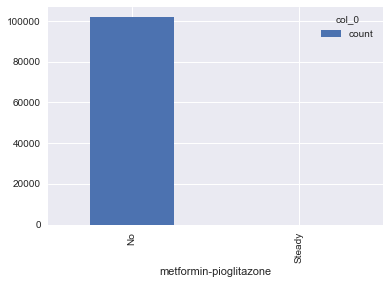

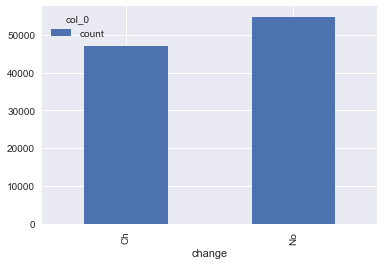

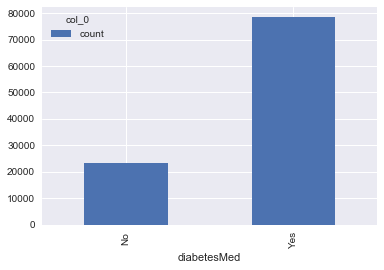

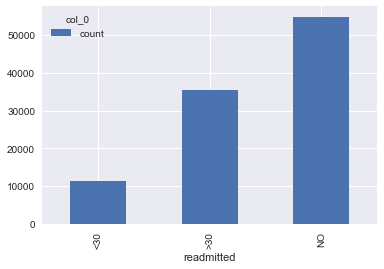

In [167]:
for i in diabetes_cat_attr:
     pd.crosstab(index = diabetes_cat_attr[i],columns="count").plot(kind="bar")

#### Numerical attributes

In [168]:
for i in diabetes_num_attr :
    diabetes_num_attr[i] = diabetes_num_attr[i].astype(np.int64)

diabetes_num_attr.dtypes

encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

In [169]:
# correlation matrix
cor = diabetes_num_attr.corr()
cor

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
time_in_hospital,-0.062221,-0.024092,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.082803,0.062352,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.030962,0.012480,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.265149,0.226847,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


#### Correlation plot

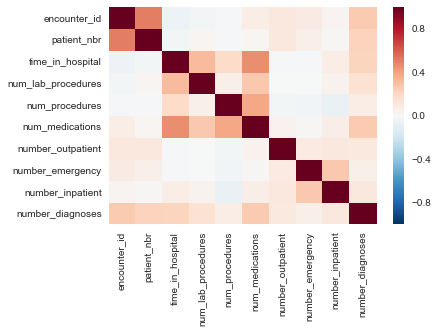

In [170]:
sns.heatmap(cor)

#### Histograms for numerical attributes

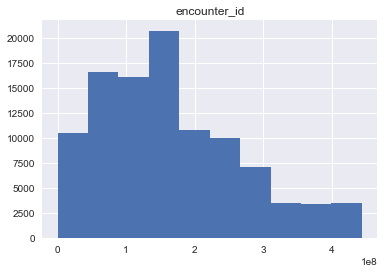

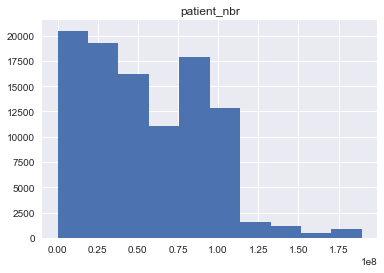

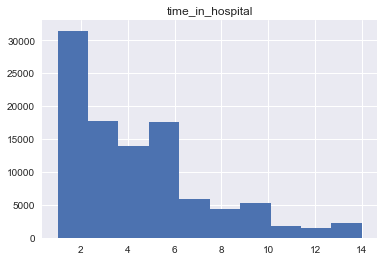

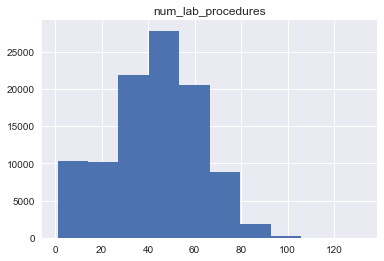

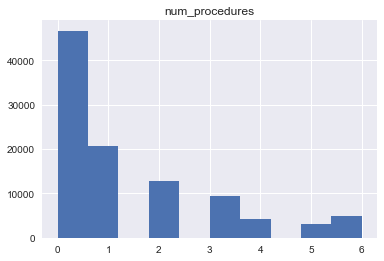

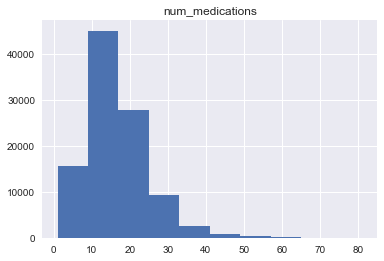

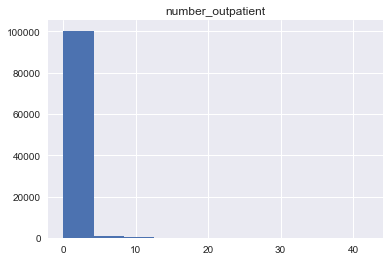

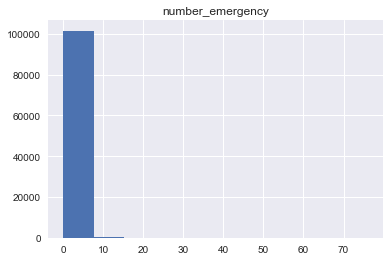

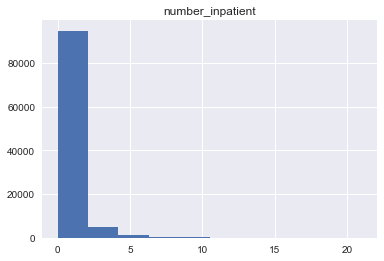

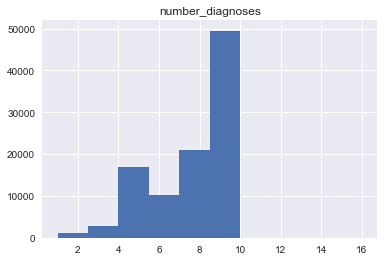

In [171]:
for i in diabetes_num_attr:
    diabetes_num_attr.hist(i)

#### Combining numerical and categorical attributes 

In [172]:
a = [diabetes_num_attr,diabetes.weight,diabetes_cat_attr]

diabetes_new = pd.concat(a,axis=1)
print(diabetes_new.shape)
print(diabetes_new.dtypes)

(101766, 50)
encounter_id                   int64
patient_nbr                    int64
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
weight                        object
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide              

#### Removing variables with no variance & with huge missing values

In [173]:
diabetes_new = diabetes_new.drop(['encounter_id', 'patient_nbr','weight','race','medical_specialty','payer_code','examide','citoglipton'],1)

#### Droping the missing values

In [174]:
diabetes_new = diabetes_new.dropna()

In [175]:
print(diabetes_new.shape)
print(diabetes_new.dtypes)
print(diabetes_new.isnull().sum())

(100241, 42)
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide              

#### Replacing string with codes in categorical variables

In [176]:
s = ['gender', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

for i in s :
    diabetes_new[i] = diabetes_new[i].cat.codes
for i in s : 
    diabetes_new[i] = diabetes_new[i].astype('category')
    

#### Train Test and Validation Split

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
y = diabetes_new.diabetesMed
x = diabetes_new.drop(['diabetesMed'],1)

In [179]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,train_size = 0.8)

In [180]:
x_train,x_val,y_train,y_val = train_test_split(xtrain, ytrain,test_size = 0.2)

In [181]:
print(x_train.shape,y_train.shape) # 60 %  
print(x_val.shape,y_val.shape) # 20 % 
print(xtest.shape,ytest.shape) # 20 %

(64153, 41) (64153,)
(16039, 41) (16039,)
(20049, 41) (20049,)


## Model Building

In [182]:
from sklearn.linear_model import LogisticRegression

#### Logistic Model

In [189]:
model = LogisticRegression()
log_model = model.fit(x_train, y_train)

#### Predictions

In [184]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

#### Confusion Matrix

In [185]:
from sklearn import metrics
metrics.confusion_matrix(y_val,val_pred)

array([[ 3734,     0],
       [   31, 12274]])

In [186]:
metrics.accuracy_score(y_val,val_pred) ### Validation Predictions

0.99806721117276642

#### Test predictions

In [187]:
testprediction = model.predict(xtest)

In [199]:
print('Accuracy is',metrics.accuracy_score(ytest,testprediction))
print('Precision is ',metrics.precision_score(ytest,testprediction))
print('Recall is',metrics.recall_score(ytest,testprediction))
print('F1 score is',metrics.f1_score(ytest,testprediction))
print('Auc is ',metrics.auc(testprediction,ytest,reorder=True))

Accuracy is 0.998403910419
Precision is  1.0
Recall is 0.997925714656
F1 score is 0.998961780546
Auc is  1.0
